# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [13]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [14]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [15]:
d.mean()

height    154.597093
weight     44.990486
age        41.138494
male        0.468750
dtype: float64

In [16]:
d.std()

height     7.742332
weight     6.456708
age       15.967855
male       0.499733
dtype: float64

## Task 1. Prior predictive checks

In [17]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:compiling stan file /home/lab4/height_1_ppc.stan to exe file /home/lab4/height_1_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

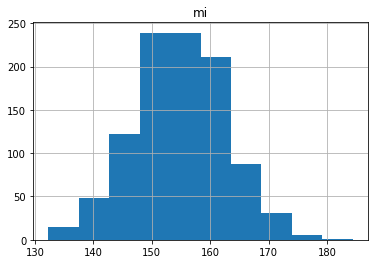

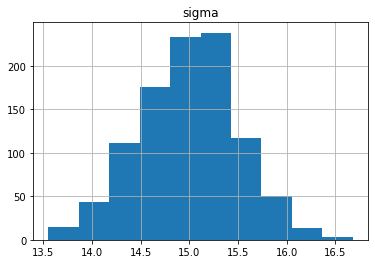

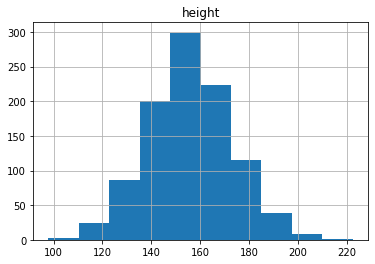

In [18]:
df1 = sim.draws_pd()
df1.hist(column='mi')
df1.hist(column='sigma')
df1.hist(column='height')
plt.show()

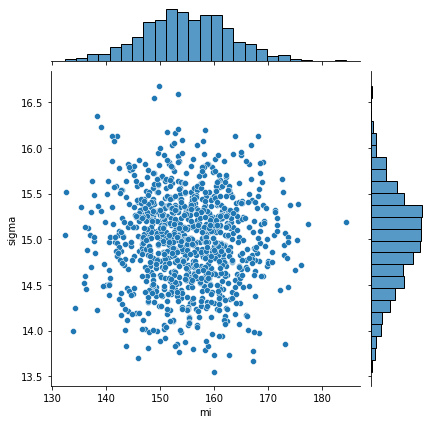

In [19]:
sns.jointplot(data=df1, x="mi", y="sigma")
plt.show()

In [20]:
d.describe()

,height,weight,age,male
count,352.000000,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494,0.468750
std,7.742332,6.456708,15.967855,0.499733
min,136.525000,31.071052,18.000000,0.000000
25%,148.590000,40.256290,28.000000,0.000000
50%,154.305000,44.792210,39.000000,0.000000
75%,160.655000,49.292693,51.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


In [21]:
df1.describe()

,lp__,accept_stat__,mi,sigma,height
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,154.894001,14.990923,155.936476
std,0.0,0.0,7.845494,0.503213,17.239139
min,0.0,0.0,132.297000,13.551300,97.839500
25%,0.0,0.0,149.612000,14.648125,143.970000
50%,0.0,0.0,154.769000,15.011050,155.964500
75%,0.0,0.0,160.312500,15.323700,166.538250
max,0.0,0.0,184.400000,16.680500,222.560000


Samples are consistent with priors - the mean of height and values of quantiles are similar in both cases.

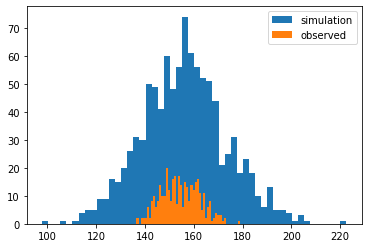

In [35]:
plt.hist(df1['height'], label = 'simulation', bins=50)
plt.hist(d['height'], label = 'observed', bins=50)
plt.legend()
plt.show()

Observations are inside the simulation so they can be obtained using this simulation.

## Task 2. Model fit and evaluation

In [36]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_1_fit.stan to exe file /home/lab4/height_1_fit
INFO:cmdstanpy:compiled model executable: /home/lab4/height_1_fit


In [37]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


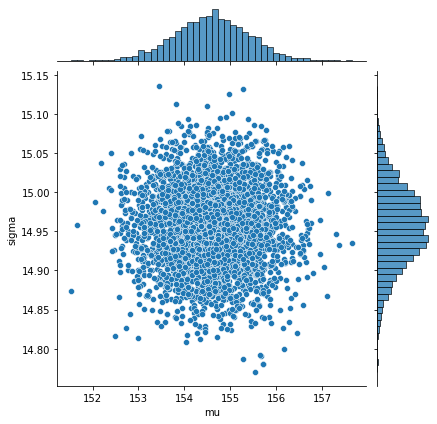

In [40]:
df2 = fit.draws_pd()
sns.jointplot(data=df2, x="mu", y="sigma")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


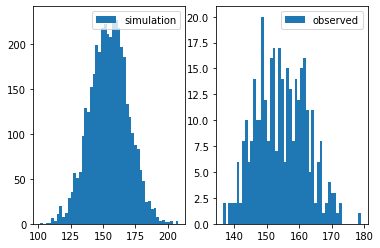

In [43]:
plt.subplot(121)
plt.hist(df2['height'], label = 'simulation', bins=50)
plt.legend()
plt.subplot(122)
plt.legend()
plt.hist(d['height'], label = 'observed', bins=50)
plt.legend()
plt.show()

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [44]:
d['c_weight'] = d.weight / d.weight.mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [48]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/lab4/height_2a_ppc.stan to exe file /home/lab4/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2a_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

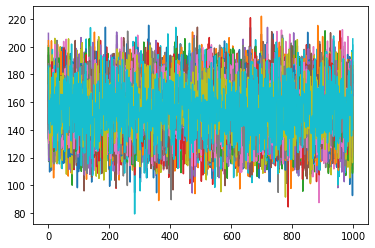

In [59]:
weights = data_sim['weight']
N = data_sim['N']
df4 = sim.draws_pd()
for i in range(N):
    plt.plot(df4['height['+ str(i+1)+ ']'])
plt.show()

This heights can be observed in nature - the maximum human height was 272cm.

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [60]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_2b_ppc.stan to exe file /home/lab4/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2b_ppc


In [61]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

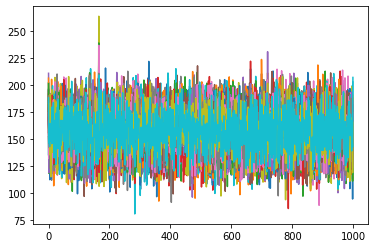

In [62]:
df5 = sim.draws_pd()
for i in range(N):
    plt.plot(df5['height['+ str(i+1)+ ']'])
plt.show()

This heights are consistent with existing in nature.

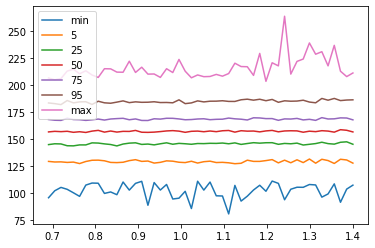

In [66]:
q5 = []
q25 = []
q50 = []
q75 = []
q95 = []
max = []
min = []
for i in range(N):
    q5.append(df5['height[' + str(i + 1) + ']'].quantile(0.05))
    q25.append(df5['height[' + str(i + 1) + ']'].quantile(0.25))
    q50.append(df5['height[' + str(i + 1) + ']'].quantile(0.5))
    q75.append(df5['height[' + str(i + 1) + ']'].quantile(0.75))
    q95.append(df5['height[' + str(i + 1) + ']'].quantile(0.95))
    max.append(df5['height[' + str(i + 1) + ']'].max())
    min.append(df5['height[' + str(i + 1) + ']'].min())
plt.plot(weights, min, label = 'min')
plt.plot(weights, q5, label = '5')
plt.plot(weights, q25, label = '25')
plt.plot(weights, q50, label = '50')
plt.plot(weights, q75, label = '75')
plt.plot(weights, q95, label = '95')
plt.plot(weights, max, label = 'max')
plt.legend()
plt.show()

Observed data are possible within the model because they are between minimum and maximum values in model.

## Task 6. Fitting and evaluating model


In [67]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_2_fit.stan to exe file /home/lab4/height_2_fit
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2_fit


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [68]:
data_fit={'N':50, 'heights': d.height[:N], 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
fit=model_2_fit.sample(data=data_fit,seed=28052020)


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 